## Inicjalizacja środowiska programistycznego

In [92]:
#Color printing
from termcolor import colored

#General data operations library
import math
import string
from datetime import datetime
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params) 

#append path with python modules
import importlib
import sys
sys.path.append("modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);
#Hide GPU
#tf.config.set_visible_devices([], 'GPU')

<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

# Warstwa splotowa - ang. convlolution layer.

Analiza obrazu o rozdzielczości 10M pikseli z użyciem sieci w pełni połączonej, wymaga 

$$
{\huge
(10M +1)\times N_\text{neuronów}
}
$$

wag już w pierwszej wartwie ukrytej. Taka duża liczba wag jest trudna w treningu. W szczególności jest podatna na przetrenowania, co widać na przykładzie zbioru MNIST.

W 1998 roku zaproponowano architekturę z warstwami współdzielącymi wagi - [LeNet](https://ieeexplore.ieee.org/document/726791).
Warstwy ze współdzielemien wag są obecnie nazywane warstawi splotowymi, ang. `convoliution layer`. Sieci wykorzystujące takie warstwy to 
sieci konwolucyjne, ang. `convolution neural network, CNN`

Źródło rysunków: [A guide to convolution arithmetic for deep learning](https://arxiv.org/abs/1603.07285)

- **jądro, ang. `kernel/filter`** - zbiór wag wspólny dla calego obrazu. Jądro zwykle ma podstać macierzy kwadratowej.

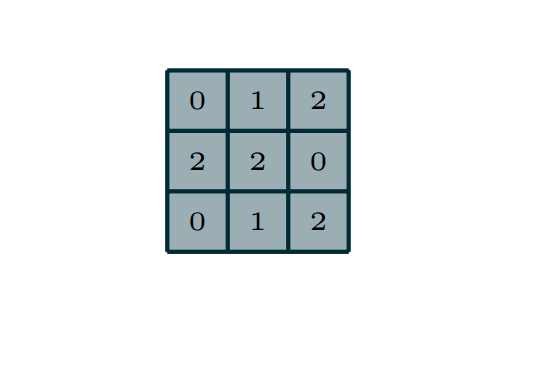

- **pole recepcyjne** - obszar objęty zbiorem różnych wag. Pole recepcyjne przesuwa się po obrazie

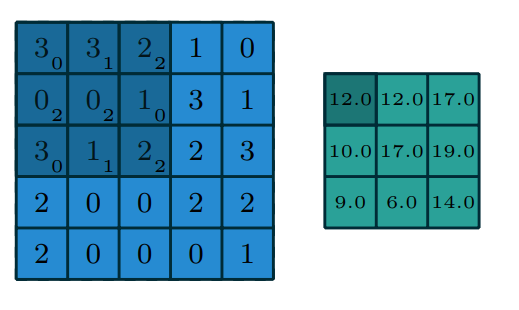

* **krok, ang. stride** - liczba indeksów o jakie przesuwa się pole recepcyjne. Tutaj `stride=1`

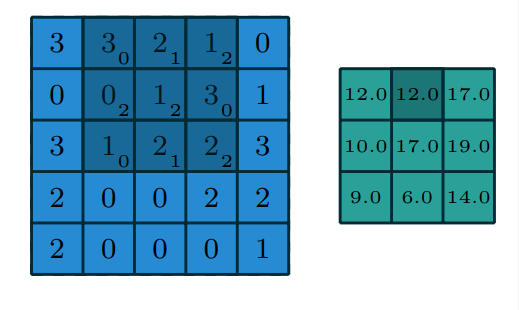


* **wypełnienie, ang. padding** - sposób rozszerzenia obrazu w celu uzyskania pożadanego kształtu wyniku warsty konwolucyjnej, np. zachowania tego samego kształtu dla kolejnych warstw konwolucyjnych. Tutaj: wypełnienie zerami, ang. `zero padding`.

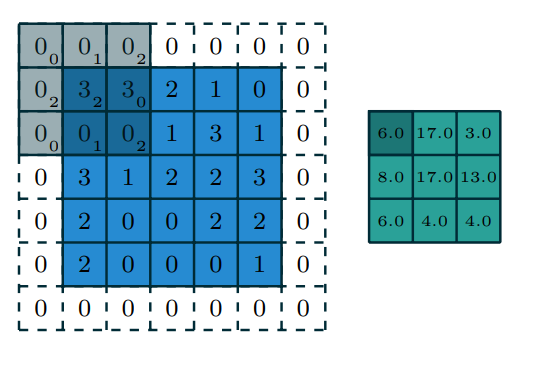


* **dylatacja** - odstęp między elementami pola recepcyjnego. Odstęp  wynosi `d-1` - czyli brak odstępu odpowiada `n=1`

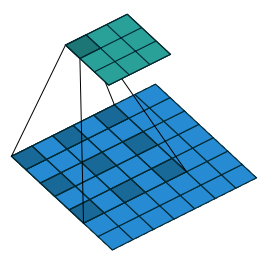

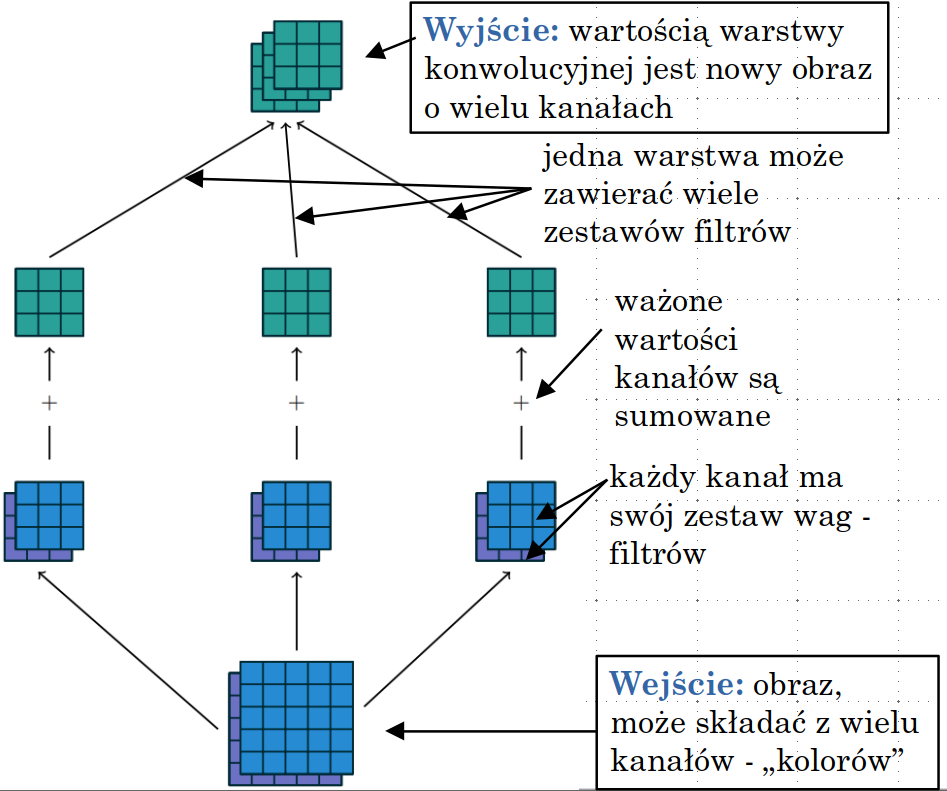

Interfejs użytkownika warsty kowolucyjnej w Keras:

```Python
tf.keras.layers.Conv2D(
    filters,                    #liczba filtrów
    kernel_size,                #rozmiar filtra: krotka (n,m), lub (n) dla filtrów kwadratowych
    strides=(1, 1),             # wartość kroku w obu wymiarach
    padding='valid',            # sposób dopelnienia: 
                                # `valid` - brak dopełnienia
                                # `same` - dopełnienie zerami na brzegach, tak by wyjście miało ten sam rozmiar
                                #  przestenny, co wejście: (batch size, liczba filtrów, W, H)
    data_format=None,           # specyfikacja kolejności wymiarów: 
                                # "channels_first" - (batch size, liczba kanałów, W, H)
                                # "channels_last" - (batch size, W, H, liczba kanałów) <-- domyślne w TF
    dilation_rate=(1, 1),       # dylatacja (n,m) - splot bierze co (n-1, m-1) element w polu recepcyjnym 
    groups=1,                   # liczebność grup kanałów, które mają wspólne wagami.
)
```

**Uwaga:** warstwy w środowisku `Keras` zakładają, że dane wejściowe są podawane w postaci paczek, `batches`. 

**Proszę**:

* zbudować warstwę konwolucyjną z jednym filtrem o rozmiarze `(3,3)` i pozostałych parametrach z domyślnymi wartościami
* podać na jej wejściu rysunek o rozmiarze `(16,16)` wypełniony jedynkami
* wypisać na ekran kształt wejścia i wyjścia warstwy

**Wskazówka:** proszę zajrzeć do dokumentacji `tf.keras.layers.Conv2D()` i sprawdzić możliwe argumenty kontruktora

In [5]:
#BEGIN_SOLUTION
layer = tf.keras.layers.Conv2D(filters = 1, kernel_size=(3,3))
data = np.full((1,16,16, 1), 1.0)

print(colored("Input shape:","blue"),data.shape)
print(colored("Output shape:","blue"),layer(data).shape)
#END_SOLUTION
pass

Input shape: (1, 16, 16, 1)
Output shape: (1, 14, 14, 1)


**Proszę**:

* zbudować warstwę konwolucyjną z jednym filtrem o rozmiarze `(3,3)` i wypełnianiem ustawionym na `same`
* podać na jej wejściu rysunek o rozmiarze `(16,16)` wypełniony jedynkami
* wypisać na ekran kształt wejścia i wyjścia warstwy

In [6]:
#BEGIN_SOLUTION
layer = tf.keras.layers.Conv2D(filters = 1, kernel_size=(3,3), padding='same')
data = np.full((1,16,16, 1), 1.0)

print(colored("Input shape:","blue"),data.shape)
print(colored("Output shape:","blue"),layer(data).shape)
#END_SOLUTION
pass

Input shape: (1, 16, 16, 1)
Output shape: (1, 16, 16, 1)


**Proszę:**

* wydobyć z warstwy konwolucyjnej macierz filtra i wypisać ją na ekran
* wypisać jej wartości
* zadać nowy filtr w postaci:

$$
\Large{
\begin{bmatrix}
0 & 1 & 0\\
1 & 0 & 1 \\
0 & 1 & 0
\end{bmatrix}
}
$$
* uruchomić filtr na danych, które pozwolą na sprawdzenie poprawności zadania wartości filtra z oboma wariantami wypełniania: `valid` i `same`

In [7]:
#BEGIN_SOLUTION
layer = tf.keras.layers.Conv2D(filters = 1, kernel_size=(3,3), padding='same')
layer(data)
print(colored("kernel shape:","blue"),layer.weights[0].shape)
print(colored("kernel value:","blue"),layer.weights[0][:,:,0,0])


kernel = np.array([[0.0, 1.0, 0.0],
                   [1.0, 0.0, 1.0],
                   [0.0, 1.0, 0.0]])

layer = tf.keras.layers.Conv2D(1, (3, 3), 
                               activation='linear',
                               padding="same",
                               kernel_initializer = tf.keras.initializers.Constant(kernel),
                               use_bias=False)
data = np.full((1,3,3,1), 1.0)

layer(data)
print(colored("kernel shape:","blue"),layer.weights[0].shape)
print(colored("kernel value:\n","blue"),layer.weights[0][:,:,0,0])
print(colored("Input:\n","blue"), data[0,:,:,0])
print(colored("Output with same padding:\n","blue"), layer(data)[0,:,:,0])

layer.padding = 'valid'
print(colored("Output with valid padding:\n","blue"), layer(data)[0,:,:,0])
#END_SOLUTION
pass

kernel shape: (3, 3, 1, 1)
kernel value: tf.Tensor(
[[ 0.09455431  0.5750829  -0.08232054]
 [ 0.30328804 -0.5498407   0.07393235]
 [ 0.32261407  0.1379419   0.01138788]], shape=(3, 3), dtype=float32)
kernel shape: (3, 3, 1, 1)
kernel value:
 tf.Tensor(
[[0. 1. 0.]
 [1. 0. 1.]
 [0. 1. 0.]], shape=(3, 3), dtype=float32)
Input:
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Output with same padding:
 tf.Tensor(
[[2. 3. 2.]
 [3. 4. 3.]
 [2. 3. 2.]], shape=(3, 3), dtype=float32)
Output with valid padding:
 tf.Tensor([[4.]], shape=(1, 1), dtype=float32)


**Proszę:**

* przygotować rysunek o rozmiarze `(128,128)` z losowo umieszczonymi kwadratami `(3,3)` i okręgami o promieniu `1`
* przygotować warstwy konwolucyjne z filtrami:
    * kwadratowym:
$$
\Large{
\begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
}
$$    
    * liniowym
  $$
\Large{
\begin{bmatrix}
0 & 1 & 0\\
0 & 1 & 0 \\
0 & 1 & 0
\end{bmatrix}
}
$$ 
* wykonać operację warstwy nawejściu
* narysować oryginalny rysunek i rysunki powstałe na wyjściu obu warstw
* wypisać na ekran maksymalne wartości pikseli dla kanałów wyjściowego obrazu
* narysować wyjściowe obrazy z warunkiem na minimalną wartość piksela powyżej maksymalnej dla kanału z filtrem liniowym.

Image shape: (32, 32)
Maximal pixel value for square filter: 8.0
Maximal pixel value for linear filter: 3.0


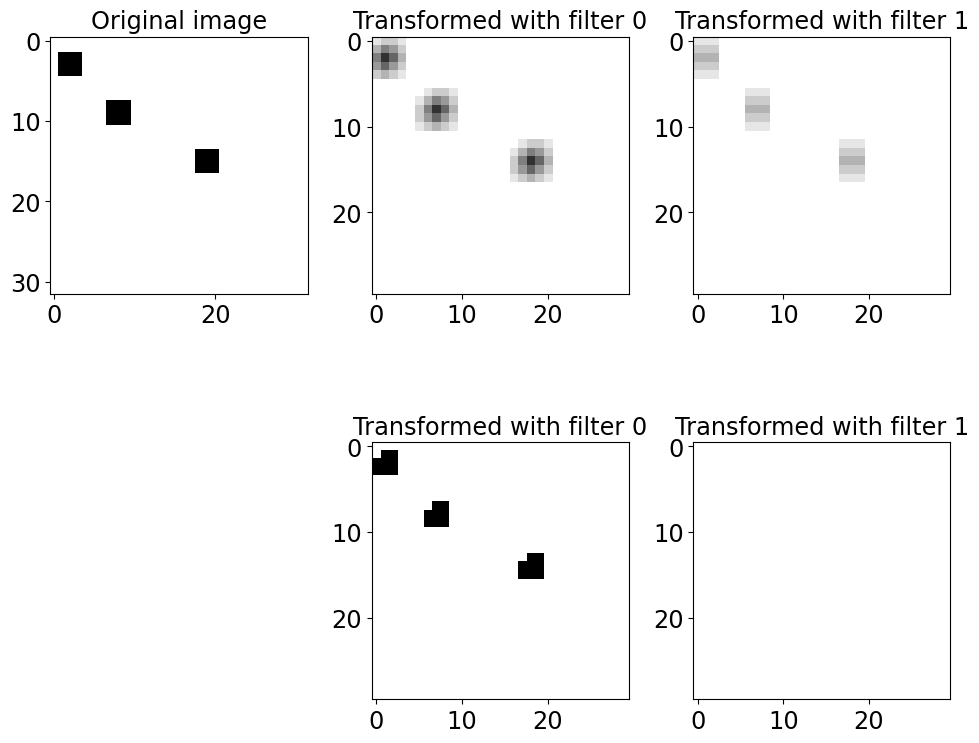

In [69]:
#BEGIN_SOLUTION
from skimage.draw import random_shapes
result = random_shapes((32, 32), max_shapes=3, 
                       shape='rectangle', 
                       min_size = 3,
                       max_size = 3,
                       intensity_range = (1,1),
                       channel_axis=None, rng=0)
image, labels = result
image = np.where(image==255, 0, image)
print(colored("Image shape:","blue"),image.shape)

rect_kernel = np.array([[1.0, 1.0, 1.0],
                        [1.0, 1.0, 1.0],
                        [1.0, 1.0, 0.0]])

circ_kernel = np.array([[0.0, 1.0, 0.0],
                        [0.0, 1.0, 0.0],
                        [0.0, 1.0, 0.0]])
kernel = np.stack( (rect_kernel, circ_kernel), axis=2)

layer = tf.keras.layers.Conv2D(2, (3, 3), 
                               activation='linear',
                               padding="valid",
                               kernel_initializer = tf.keras.initializers.Constant(kernel),
                               use_bias=False)

fig, axes = plt.subplots(2, 3, figsize=(10,10))
axes[0,0].imshow(image, cmap='binary')
axes[0,0].set_title('Original image');

data = image.reshape(1,32,32,1)
data = np.expand_dims(image, axis=0)
data = np.expand_dims(data, axis=3)

data = tf.constant(data, dtype=float)
layer_output = layer(data)
print(colored("Maximal pixel value for square filter:","blue"), tf.math.reduce_max(layer_output[0,:,:,0]).numpy())
print(colored("Maximal pixel value for linear filter:","blue"), tf.math.reduce_max(layer_output[0,:,:,1]).numpy())
threshold = tf.math.reduce_max(layer_output[0,:,:,1]).numpy()

axes[0,1].imshow(layer_output[0,:,:,0], cmap='binary', vmin=0, vmax=10)
axes[0,1].set_title('Transformed with filter 0');

axes[0,2].imshow(layer_output[0,:,:,1], cmap='binary', vmin=0, vmax=10)
axes[0,2].set_title('Transformed with filter 1');

axes[1,0].axis('off')

axes[1,1].imshow(layer_output[0,:,:,0]>threshold, cmap='binary', vmin=0, vmax=1)
axes[1,1].set_title('Transformed with filter 0');

axes[1,2].imshow(layer_output[0,:,:,1]>threshold, cmap='binary', vmin=0, vmax=1)
axes[1,2].set_title('Transformed with filter 1');
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.25, hspace=0.25)
#END_SOLUTION
pass

Warstwy konwolucyjne generują nowe obrazy. Zwykle rozdzielczość nowego obrazu jest taka jak obrazu wejściowego, ale liczba kanałów, "kolorów" wzrasta. Redukcja rozdzielczości jest uzyskiwana przez warstwy łączące, ang. `pooling layers`. 

Warstwy łączące mają podobnie jak, konwolucyjnej wąskie pole recepcyjne, ale warstwy te nie mają żandych wag, czyli parametrów podlegających treningowi - ang. `learning parameters`. Warstwy łąćzoęce zawsze wykonują tę samą operację zdefiniowaną dla danej warstwy:

* **masksimum, ang. max pooling** - maksymalna wartość w polu recepcyjnym
* **średnia, ang. average pooling** - średnia wartość w polu recepcyjny

Najbardziej popularna jest warstwa wyciągająca maksimum.  

Interfejs użytkownika warstwy wyciągającej maksimum w Keras:

```Python
tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),          #rozmiar pola recepcyjnego
    strides=None,              #wartość kroku w obu wymiarach
    padding='valid',            # sposób dopelnienia: 
                                # `valid` - brak dopełnienia
                                # `same` - dopełnienie zerami na brzegach, tak by wyjście miało ten sam rozmiar
                                #  przestenny, co wejście: (batch size, liczba filtrów, W, H)
    data_format=None,           # specyfikacja kolejności wymiarów: 
                                # "channels_first" - (batch size, liczba kanałów, W, H)
                                # "channels_last" - (batch size, W, H, liczba kanałów) <-- domyślne w TF
)
```

**Proszę:**

* wykonać operację `MaxPooling2D` na obrazach wyjściowych z warstwy splotowej z poprzedniej komórki z domyślnymi parametrami warstwy          łączącej
* narysować wynik

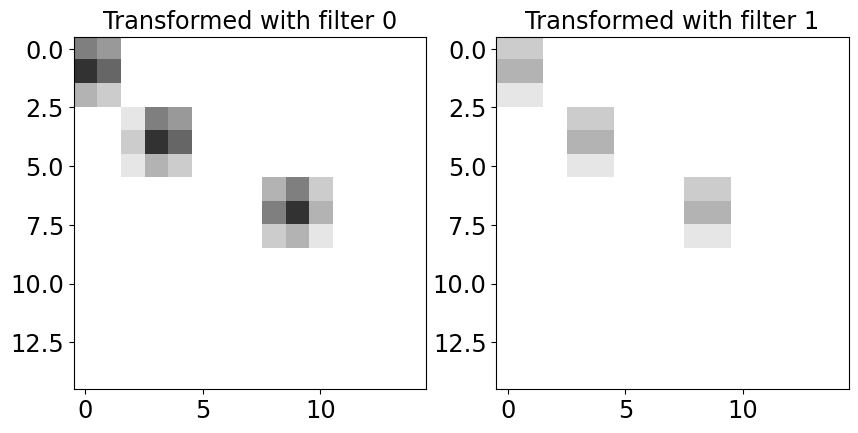

In [73]:
#BEGIN_SOLUTION
layer = tf.keras.layers.MaxPooling2D()
pool_layer_output = layer(layer_output)

fig, axes = plt.subplots(1, 2, figsize=(10,10))
axes[0].imshow(pool_layer_output[0,:,:,0], cmap='binary', vmin=0, vmax=10)
axes[0].set_title('Transformed with filter 0');

axes[1].imshow(pool_layer_output[0,:,:,1], cmap='binary', vmin=0, vmax=10)
axes[1].set_title('Transformed with filter 1');
#END_SOLUTION
pass

Standardowa architektura sieci analizującej obrazy zawiera przekładaniec warstw konwolucyjnych i lączących zakończony warstwami w pełni połączonymi:

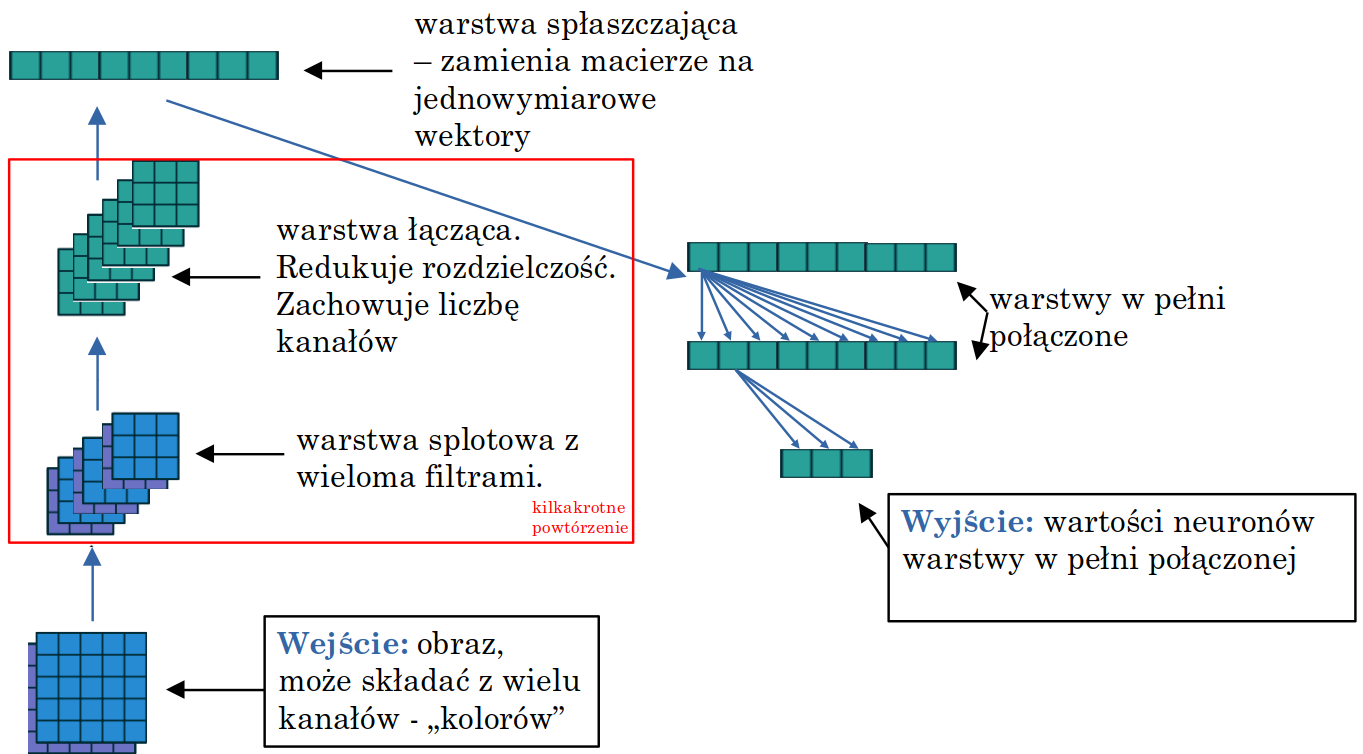

## Klasa tf.keras.Sequential

Model składający się z sekwencji warstw może być stworzony przy użyciu klasy `tf.keras.Sequential`:
```Python
tf.keras.Sequential(
    layers=None, #lista warstw modelu 
    name=None    #nazwa modelu
)
```

### Składanie modelu warstwa po warstwie:

In [74]:
model = tf.keras.Sequential(name="test_1")
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(8))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 136       
                                                                 
Total params: 136 (544.00 Byte)
Trainable params: 136 (544.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Definicja wielu warstw w jednym kroku:

In [81]:
model = tf.keras.Sequential(layers = [tf.keras.Input(shape=(16,)),                                       
                                      tf.keras.layers.Dense(16),
                                      tf.keras.layers.Dense(8)],
                             name="test_2")
model.summary()

Model: "test_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
Total params: 408 (1.59 KB)
Trainable params: 408 (1.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Proszę:**

Zbudować sieć konwolucyjną o nazwie `CNN_Digits`` i następującej strukturze:

* kształ danych wejściowych: `(28,28,1)`
* 3$\times$ blok: 
    * warstwa `Conv2D`, `64` filtry, rozmiar filtra `3`, funkcja aktywacji: `ReLU`, padding: `same`
    * wartwa `MaxPooling`, rozmiar filtra `2`
* warstwa spłaszcająca
* warstwa gęsta, `128` neuronów, funkcja aktywacji: `ReLU`
* wartwa opuszczającza, z częstością `0.5`
* warstwa gęsta, `64` neuronów, funkcja aktywacji: `ReLU`
* wartwa opuszczającza, z częstością `0.5`
* warstwa wyjściowa

Specyfikacja warstwy wyjściowej powinna być dobrana do zagadnienia:
**Klasyfikacja ręcznie pisanych cyfr**

Oczekiwana liczba parametrów:
```
Total params: 157258 (614.29 KB)
Trainable params: 157258 (614.29 KB)
Non-trainable params: 0 (0.00 Byte)
```

In [110]:
model = tf.keras.Sequential(layers = [tf.keras.Input(shape=(28,28,1)),
                                      ##
                                      tf.keras.layers.Conv2D(64, (3), activation='relu', padding="same"),
                                      tf.keras.layers.MaxPooling2D(2),
                                      ##
                                      tf.keras.layers.Conv2D(64, (3), activation='relu', padding="same"),
                                      tf.keras.layers.MaxPooling2D(2),
                                      ##
                                      tf.keras.layers.Conv2D(64, (3), activation='relu', padding="same"),
                                      tf.keras.layers.MaxPooling2D(2),
                                      ##
                                      tf.keras.layers.Flatten(),
                                      ##
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(64, activation='relu'),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(10, activation='softmax'),
                                     ],
                                     name="CNN_digits")
model.summary()

Model: "CNN_digits"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_74 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_75 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 3, 3, 64)          0

**Proszę:**

* załadować zbiór `emnist-digits-train` i podzielić go na części uczącą i walidacyjną w proporcjach `5:1`
* w module `emnist_functions` zawrzeć funkcję  `trainModel(model, features, labels, nEpochs=200)` zawierającą:
    * ustalenie harmonogramu współczynnika uczenia
    * ustalenie wczesnego zatrzymania trenowania na podstawie monitoringu funkcji strany na zbiorze walidacyjnych
        * jako zbioru walidacyjnego proszę użyć `0.1` zbioru uczącego prze ustawienie parametru
       ```Python
       
        validation_split=0.1
        
        ```
       w wywołaniu metody  `model.fit()`
    * rysowanie zmiany funkcji straty w kolejnych epokach
    * wypisanie na ekran wydajności modelu na zbiorze uczącym
* przeprowadzić trening i sprawdzenie wydajności sieci `CNN_Digits` na zbiorze walidacyjnym

In [ ]:
!pip install idx2numpy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch 17: early stopping
Evaluation on training dataset:
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0095 - accuracy: 0.9981
Evaluation on validation dataset:
313/313 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.9919
CPU times: user 58.7 s, sys: 2.43 s, total: 1min 1s
Wall time: 50 s


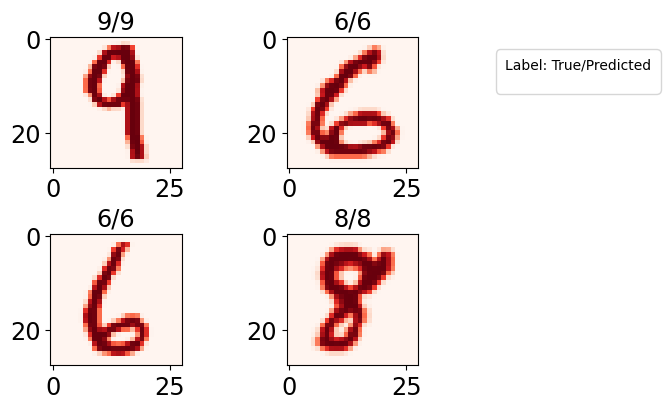

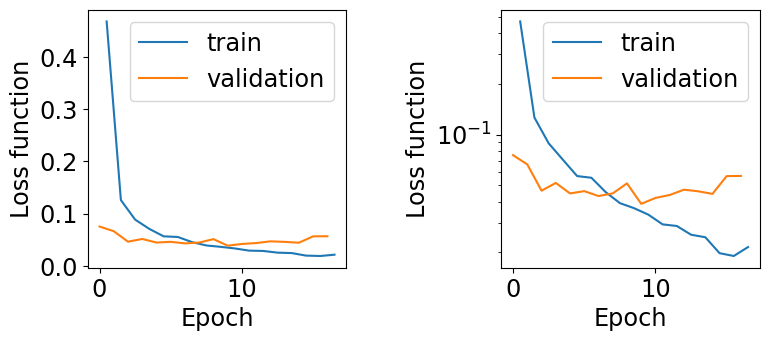

In [111]:
%%time
#BEGIN_SOLUTION

datasetName = "emnist-digits-train"
datasetPath = "/scratch_hdd/akalinow/Zajecia/2023-2024/Lato/Uczenie_maszynowe_2/UczenieMaszynoweII/data/EMNIST/gzip/"
features, labels = emnist_fcn.getEMNIST(datasetName, datasetPath)
emnist_fcn.plotMNIST(features, labels, labels)

nTrainExamples = 50000
nValExamples = 10000
x_train = features[:nTrainExamples]
y_train = labels[:nTrainExamples]

x_val = features[-nValExamples:]
y_val = labels[-nValExamples:]

import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);
emnist_fcn.trainModel(model, x_train, y_train)

print(colored("Evaluation on validation dataset:","blue"))
model.evaluate(x_val, y_val)
#END_SOLUTION
pass

**Proszę:**

* narysować osiem losowych przykładów w których odpowiedź modelu nie jest poprawna

313/313 [==============================] - 0s 954us/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


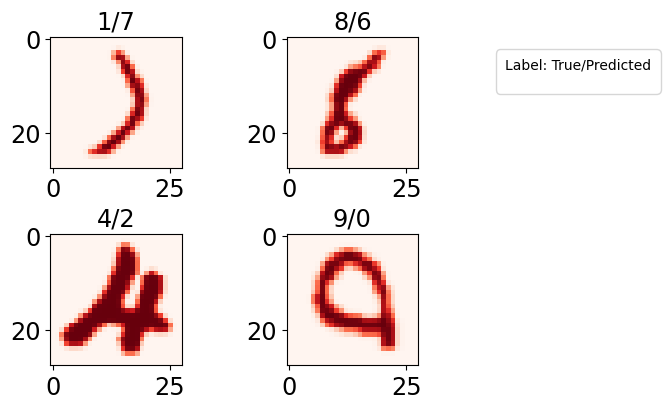

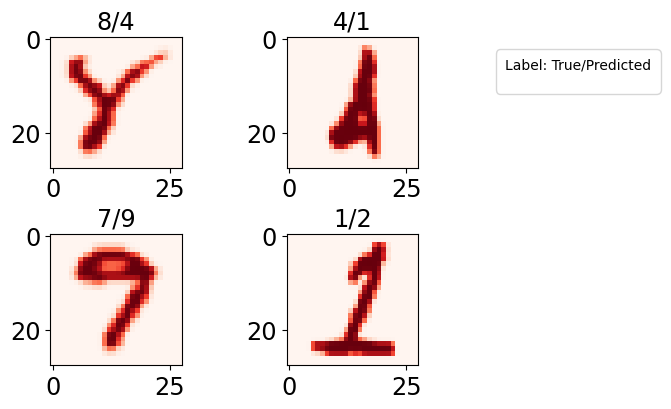

In [112]:
y_pred = tf.argmax(model.predict(x_val), axis=1)
mask = y_val!=y_pred
emnist_fcn.plotMNIST(x_val[mask], y_val[mask], y_pred[mask])
emnist_fcn.plotMNIST(x_val[mask], y_val[mask], y_pred[mask])

# Zadanie domowe

Trening klasyfikatora **konwolucyjnego** na zbiorze liter i cyfr `emnist-balanced-train`.

**Proszę:**

* zachować jedynie przykłady z klas o numerze mniejszym niż 36 (cyfry i małe litery)
* zdefiniować i przeprowadzić trening modelu.
  **Kod powinien jedynie używać funkcji zdefiniowanych w komórkach
  zadania domowego i module `emnist_functions`**
* wypisać na ekran dokładność, `accuracy`, modelu na zbiorach treningowym i testowym
* dla zbiorów treningowego i testowego narysować macierze pomyłek z odpowienimi etykietami na osiach
* wskazać klasy które słabo się separują
* odkodować komunikat zapisany w pliku [encoded.npz](http://studenci.fuw.edu.pl/~akalinow/encoded.npz)
    * plik zawiera macierz o kształcie `(-1,28,28)` którą można wczytać następująco:
    ```Python
    
    fileName = "encoded.npz"
    with open(fileName, 'rb') as file:
        encoded = np.load(file)
    ```
* odkodowany komunikat wypisać na ekran w postaci napisu:
```Python
Decoded message is: hello world
```  

In [118]:
#Input data loading
#BEGIN_SOLUTION
import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

datasetName = "emnist-balanced-train"
datasetPath = "data/EMNIST/gzip/"
lastClassNumber = 36

x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
mask = y<lastClassNumber
x_train = x[mask]
y_train = y[mask]

datasetName = "emnist-balanced-test"
datasetPath = "data/EMNIST/gzip/"
x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
mask = y<lastClassNumber
x_test = x[mask]
y_test = y[mask]

nCategories = len(tf.unique(y_train)[0])

print(colored("Training data shapes:","blue"), x_train.shape, y_train.shape)
print(colored("Test data shapes:","blue"), x_test.shape, y_test.shape)
print(colored("Number of categories:","blue"),nCategories)
#END_SOLUTION
pass

Training data shapes: (86400, 28, 28) (86400,)
Test data shapes: (14400, 28, 28) (14400,)
Number of categories: 36


In [119]:
#model definition
#BEGIN_SOLUTION
model = tf.keras.Sequential(layers = [tf.keras.Input(shape=(28,28,1)),
                                      ##
                                      tf.keras.layers.Conv2D(64, (3), activation='relu', padding="same"),
                                      tf.keras.layers.MaxPooling2D(2),
                                      ##
                                      tf.keras.layers.Conv2D(64, (3), activation='relu', padding="same"),
                                      tf.keras.layers.MaxPooling2D(2),
                                      ##
                                      tf.keras.layers.Conv2D(64, (3), activation='relu', padding="same"),
                                      tf.keras.layers.MaxPooling2D(2),
                                      ##
                                      tf.keras.layers.Flatten(),
                                      ##
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(64, activation='relu'),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(nCategories, activation='softmax'),
                                     ],
                                     name="CNN_letters")
#END_SOLUTION
pass

Epoch 9: early stopping
Evaluation on training dataset:
2700/2700 [==============================] - 3s 1ms/step - loss: 0.1625 - accuracy: 0.9324
Evaluation on test dataset:
450/450 [==============================] - 1s 1ms/step - loss: 0.2869 - accuracy: 0.9098
CPU times: user 42.4 s, sys: 1.49 s, total: 43.9 s
Wall time: 37.8 s


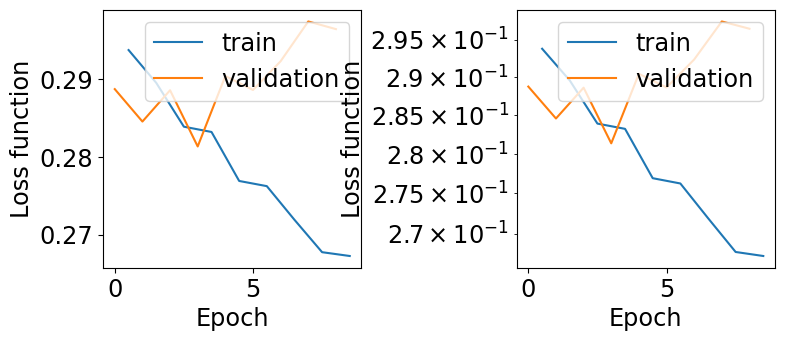

In [123]:
%%time
#model training
#BEGIN_SOLUTION
emnist_fcn.trainModel(model, x_train, y_train)
print(colored("Evaluation on test dataset:","blue"))
model.evaluate(x_test, y_test)
#END_SOLUTION
pass

450/450 [==============================] - 0s 1ms/step


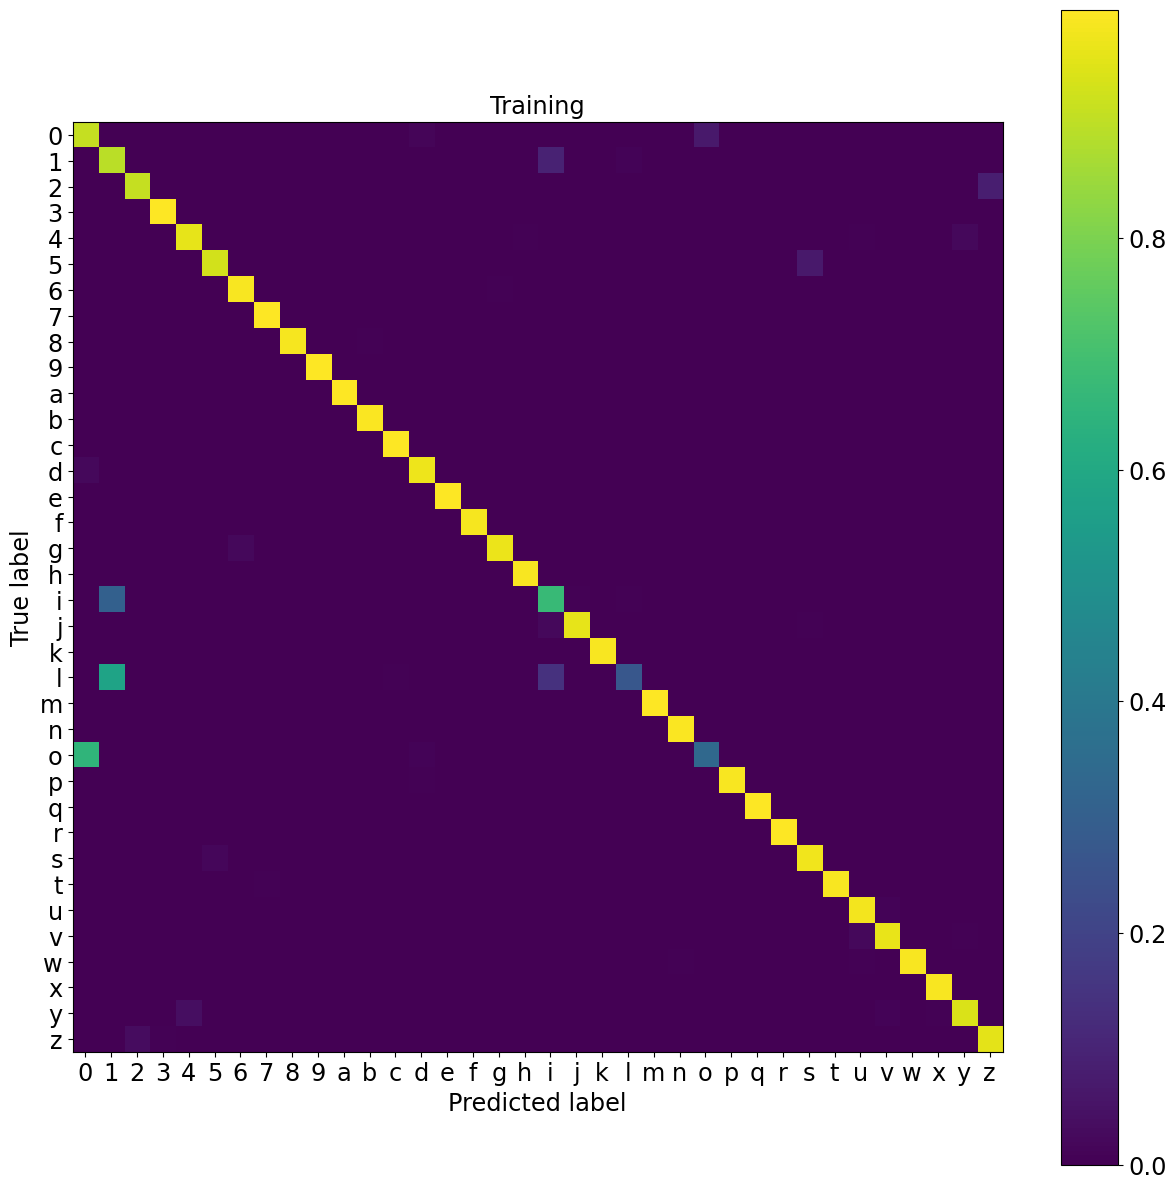

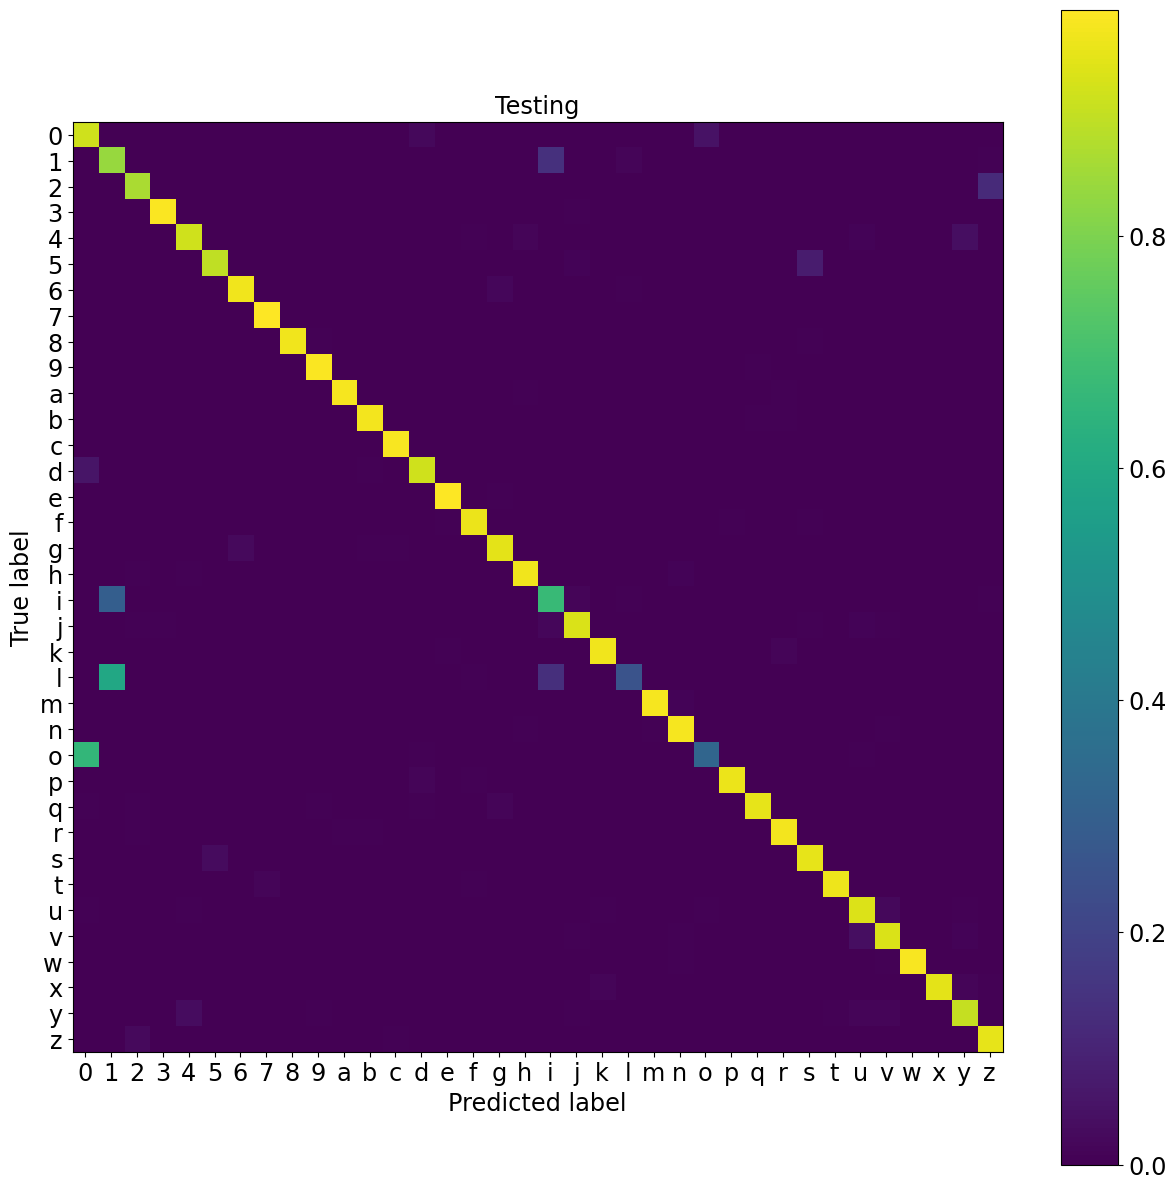

In [121]:
#evaluation
#BEGIN_SOLUTION
y_pred = tf.argmax(model.predict(x_train), axis=1)
emnist_fcn.plotMNIST_CM(y_train,y_pred,"Training")

y_pred = tf.argmax(model.predict(x_test), axis=1)
emnist_fcn.plotMNIST_CM(y_test,y_pred,"Testing")
#END_SOLUTION
pass

In [124]:
#message decoding
#BEGIN_SOLUTION
fileName = "data/encoded.npz"
with open(fileName, 'rb') as file:
    encoded = np.load(file)

spaces_mask = np.sum(encoded, axis=(1,2))>0
decoded = tf.argmax(model.predict(encoded), axis=1)
digits = [str(item) for item in range(0,10)]
letters_lower = list(string.ascii_lowercase)
digits_letters = np.array(digits + letters_lower)
decoded = digits_letters[decoded]
decoded = np.where(spaces_mask, decoded, " ")
decoded = ''.join(decoded)
print(colored("Decoded message is:","blue"),decoded)
#END_SOLUTION
pass

1/1 [==============================] - 0s 64ms/step
Decoded message is: tme cake is a lie
